In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# https://docs.python.org/3/library/io.html
import io
import os

# https://python-guide-pt-br.readthedocs.io/fr/latest/scenarios/imaging.html
from PIL import Image 

# https://docs.python.org/fr/3/library/hashlib.html
import hashlib # permet de chiffrer 

import csv
import time
import random
import sys
import numpy as np
 
# selenium package
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import UnexpectedAlertPresentException
from selenium.common.exceptions import WebDriverException
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select
import multiprocessing
from threading import Thread
from time import sleep


# beautiful soup
from bs4 import BeautifulSoup 
import requests 

# image traitement et features extraction
from PIL import Image, ImageOps, ImageEnhance
import os, sys
import numpy as np
import mahotas
import cv2
import os
import h5py


from time import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 
from sklearn import mixture
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from matplotlib import cm
from matplotlib.colors import LogNorm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### SVM
from sklearn import neighbors, datasets, preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_error
##SVM
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


## rename images

In [ ]:
import os

#dirname='C:/Users/utilisateur/Documents/DataIA/Projet/Projet_Classification_ZARA/clothes_treatment/Raw_Images/'
dirname='C:/Users/utilisateur/Documents/DataIA/Projet/Projet_Classification_ZARA/Algo/Images/'
folders=os.listdir(dirname) # ie ['jupes','pantalons','robes','t-shirts']

def rename_file():
    for folder in folders:
        path=dirname+folder
        for i, filename in enumerate(os.listdir(path)):
            os.rename(path + "/" + filename, path + "/" + folder[:-1]+'_'+ str(i) + ".jpg") # folder[:-1] c'est juste pour enlever le s
            # output = jupe_0.jpg ; jupe_1.jpg etc...
            
#rename_file()

In [ ]:
import glob


####################################
images_per_class = 80
fixed_size = tuple((56, 56))
##################################

train=[]
target=[]
image=[]

dirname='C:/Users/utilisateur/Documents/DataIA/Projet/Projet_Classification_ZARA/Algo/Images/'
folders=os.listdir(dirname)





# for folder in folders:
#     path=dirname+folder
#     for file in os.listdir(path):
image=cv2.imread('C:/Users/utilisateur/Documents/DataIA/Projet/Projet_Classification_ZARA/Algo/Images/jupes/jupe_0.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.show()
resized=cv2.resize(image, fixed_size, interpolation=cv2.INTER_AREA)
plt.imshow(resized, cmap=plt.cm.gray)
plt.show()
image_cvt=cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
plt.imshow(image_cvt, cmap=plt.cm.gray)
plt.show()    


# img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
#         resized=cv2.resize(image, fixed_size, interpolation=cv2.INTER_AREA)
#         plt.imshow(resized, cmap=plt.cm.gray)
#         image_cvt=cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
                

# Traitement 

In [2]:
images_per_class = 80
fixed_size = tuple((56, 56))

MAINDIR='C:/Users/utilisateur/Documents/DataIA/Projet/Projet_Classification_ZARA/Algo/'
DATADIR=MAINDIR + 'images_without_models/'
folders=os.listdir(DATADIR)
CATEGORIES=os.listdir(DATADIR)
image_test='C:/Users/utilisateur/Documents/DataIA/Projet/Projet_Classification_ZARA/Algo/Images/jupes/jupe_0.jpg'

def traitement():
    for category in CATEGORIES: 
        clothe_class=category[:-1]  #ie jupe, pantalon, robe or t-shirt
        for image in os.listdir(DATADIR+category):  #image : nom de l'image ie jupe_0.jpg
            image_path =os.path.join(DATADIR+category+'/'+image) # path = path de l'image
            #image_path = 'C:/Users/utilisateur/Documents/DataIA/Projet/Projet_Classification_ZARA/Algo/Images/jupes/jupe_0.jpg'
            ### load the image ###
            img = cv2.imread(image_path)
#             plt.imshow(img)
#             plt.show()
            ### resize ###
            resized=cv2.resize(img, fixed_size, interpolation=cv2.INTER_AREA)
#             plt.imshow(resized)
#             plt.show()
            ## convert the image to grayscale ###
            imgGray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
            return imgGray,clothe_class, image
#         cv2.imshow('title',imgGray)
#         cv2.waitKey(0)
 
#         cv2.destroyAllWindows()

imgGray,clothe_class, image=traitement()
imgGray.shape
clothe_class

(56, 56)

'jupe'

In [3]:
def traitement_image(image_path):
    ### Load image ###
    img = cv2.imread(image_path)
#   plt.imshow(img)
#   plt.show()
    ### resize ###
    resized=cv2.resize(img, fixed_size, interpolation=cv2.INTER_AREA)
#   plt.imshow(resized)
#   plt.show()
    ## convert the image to grayscale ###
    imgGray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)  
#   cv2.imshow('title',imgGray)
#   cv2.waitKey(0)
#   cv2.destroyAllWindows()
    return imgGray

# Data Set Creation

In [4]:
Data = [] # Data will contain matrix of pixels 
Target_name = [] # will contain the category
Data_name = [] # will contain the name of the image ie : jupe_01
Image=[]
def DataSetCreation():
    for category in CATEGORIES: 
        clothe_class=category[:-1]  #ie jupe, pantalon, robe or t-shirt
        for image in os.listdir(DATADIR+category):  #image : nom de l'image ie jupe_0.jpg
            image_path =os.path.join(DATADIR+category+'/'+image) # path = path de l'image
            imgGray=traitement_image(image_path)
            imgGray_flat=np.array(imgGray).flatten()
            try:
                Image.append(imgGray)
                Target_name.append(clothe_class)
                Data.append(imgGray_flat)
                Data_name.append(image[:-4])
            except Exception as e:
                print(e)
    return np.array(Data), np.array(Target_name), np.array(Data_name), np.array(Image) 
# Data, Target, Data_Name, Image = DataSetCreation()   
# Data.shape
# Target.shape
# Data_Name.shape
# Image.shape

# Test sur le set d'images sans mannequins

In [5]:
images_per_class = 80
fixed_size = tuple((56, 56))

MAINDIR='C:/Users/utilisateur/Documents/DataIA/Projet/Projet_Classification_ZARA/Algo/'
DATADIR=MAINDIR + 'images_without_models/'
folders=os.listdir(DATADIR)
CATEGORIES=os.listdir(DATADIR)
#image_test='C:/Users/utilisateur/Documents/DataIA/Projet/Projet_Classification_ZARA/Algo/Images/jupes/jupe_0.jpg'

Data, Target_name, Data_Name, Image = DataSetCreation()   
Data.shape
Target_name.shape
Data_Name.shape
Image.shape

(203, 3136)

(203,)

(203,)

(203, 56, 56)

In [6]:
print(Image)

[[[240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]
  ...
  [240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]]

 [[240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]
  ...
  [240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]]

 [[245 245 245 ... 245 245 245]
  [245 245 245 ... 245 245 245]
  [245 245 245 ... 245 245 245]
  ...
  [245 245 245 ... 245 245 245]
  [245 245 245 ... 245 245 245]
  [245 245 245 ... 245 245 245]]

 ...

 [[240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]
  ...
  [240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]]

 [[240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]
  ...
  [240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 240]
  [240 240 240 ... 240 240 2

 # shuffle_arrays_unison : http://rasbt.github.io/mlxtend/user_guide/preprocessing/shuffle_arrays_unison/

In [7]:
from mlxtend.preprocessing import shuffle_arrays_unison

In [8]:
Data, Target_name, Data_Name, Image = shuffle_arrays_unison(arrays=[Data, Target_name, Data_Name, Image], random_seed=0)

In [9]:
# encode pantalon to 1 ; jupe to 0 ;  t-shirt to 3 and robe to 2

Target_name
Target=pd.Series(Target_name).astype('category').cat.codes
Target
Target_name_list = dict(enumerate(pd.Series(Target_name).astype('category').cat.categories))
Target_name_list 
Target_name_list.values()

array(['t-shirt', 'pantalon', 'pantalon', 'robe', 'pantalon', 't-shirt',
       't-shirt', 'robe', 'jupe', 't-shirt', 'robe', 't-shirt', 'robe',
       't-shirt', 't-shirt', 't-shirt', 'robe', 'robe', 't-shirt', 'jupe',
       'robe', 'robe', 'robe', 't-shirt', 'pantalon', 't-shirt',
       't-shirt', 'robe', 'pantalon', 'jupe', 't-shirt', 'pantalon',
       'pantalon', 'jupe', 'pantalon', 'pantalon', 'pantalon', 'robe',
       'jupe', 'robe', 'robe', 'robe', 'robe', 'robe', 't-shirt', 'jupe',
       'robe', 't-shirt', 'robe', 'pantalon', 'robe', 'jupe', 'pantalon',
       't-shirt', 'robe', 'robe', 't-shirt', 'robe', 'robe', 't-shirt',
       'robe', 't-shirt', 't-shirt', 't-shirt', 'robe', 't-shirt', 'robe',
       't-shirt', 'robe', 'robe', 't-shirt', 'jupe', 'pantalon', 'jupe',
       'pantalon', 'robe', 't-shirt', 't-shirt', 't-shirt', 'robe',
       't-shirt', 't-shirt', 'jupe', 'robe', 'jupe', 't-shirt',
       'pantalon', 'robe', 't-shirt', 'robe', 'pantalon', 't-shirt',
      

0      3
1      1
2      1
3      2
4      1
      ..
198    2
199    2
200    1
201    3
202    0
Length: 203, dtype: int8

{0: 'jupe', 1: 'pantalon', 2: 'robe', 3: 't-shirt'}

dict_values(['jupe', 'pantalon', 'robe', 't-shirt'])

In [53]:
# example_dict = {1:"6",2:"2",3:"f"}

# pickle_out = open("dict.pickle","wb")
# pickle.dump(example_dict, pickle_out)
# pickle_out.close()

import pickle
# Pickle : to save our own datasethttps://stackoverflow.com/questions/31791011/how-do-i-save-a-self-made-dataset-in-python-so-that-i-can-use-it-later

ZARA_DataSet_wo_models={'data': Data,
                        'target':Target,
                        'target_names':Target_name,
                        'target_name_list':list(Target_name_list.values()),
                        'data_Name':Data_Name,
                        'images': Image
                       }
 
with open("ZARA_DataSet_wo_models.pickle","wb") as outpout:
    pickle.dump(ZARA_DataSet_wo_models, outpout)


# # then you can load it back in another script.
# with open('ZARA_DataSet_wo_models.pickle', 'rb') as data:
#     ZARA_DataSet_wo_models = pickle.load(data)


In [51]:
ZARA_DataSet_wo_models.keys()


dict_keys(['data', 'target', 'target_names', 'target_name_list', 'data_Name', 'images'])

In [52]:
for key in ZARA_DataSet_wo_models.keys():
    globals()[str(key)] =ZARA_DataSet_wo_models[key]


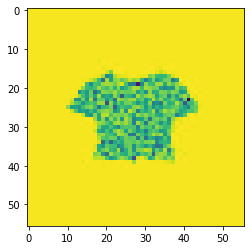

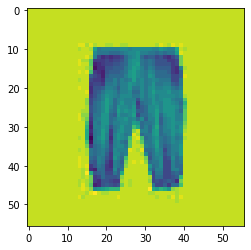

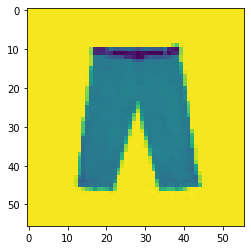

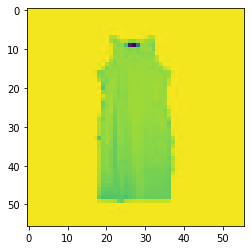

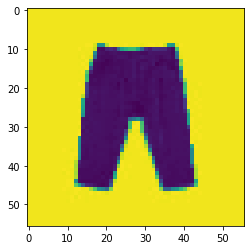

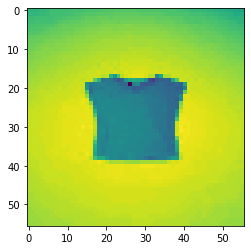

In [14]:
for i in range(0,6):
    plt.imshow(images[i])
    plt.show()
    print()

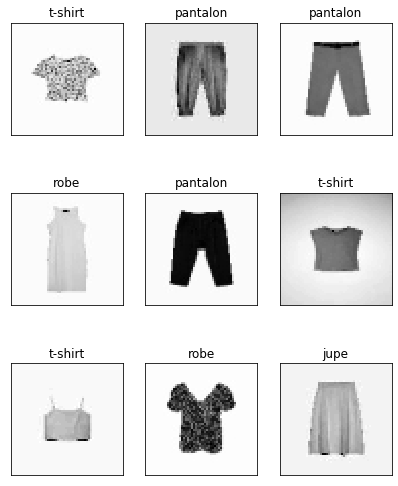

In [15]:
n_row=3; n_col=3
n_samples, h, w = images.shape

########## data subset  ############
images_subset=images[:n_row*n_col,:,:]
target_subset=target[:n_row*n_col]
target_names_subset=target_names[:n_row*n_col]
data_subset=data[:n_row*n_col,:]
#X_test=data_subset
#y_test=target_subset
##########################



def plot_gallery(images, titles, h, w, n_row=n_row, n_col=n_col):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())



plot_gallery(data_subset,target_names_subset, h, w)        

# Train Test SPLIt

In [16]:
# stratify : return train and test that have the same proportions of class labels as the input dataset.
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0, stratify=target)
#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train.shape; X_test.shape; y_train.shape; y_test.shape

(162, 3136)

(41, 3136)

(162,)

(41,)

# Utiliser une PCA 

In [17]:
# run PCA with n_components 150
n_components = 150
sc = StandardScaler().fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

pca=PCA(n_components=n_components, svd_solver='randomized', whiten=True)

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train_scaled.shape[0]))
t0 = time()

pca = pca.fit(X_train_scaled)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 162 faces
done in 0.228s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.018s


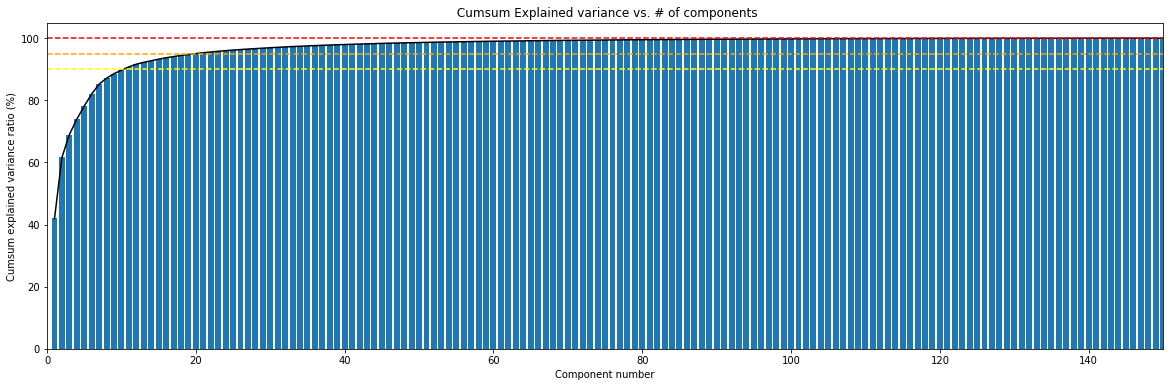

In [18]:
#cumul de variance expliquée
plt.figure(figsize=(20,6))
plt.plot(np.arange(1,n_components+1),np.cumsum(pca.explained_variance_ratio_)*100, color='black')
plt.bar(np.arange(1,n_components+1),np.cumsum(pca.explained_variance_ratio_)*100)
plt.axhline(y=90, color='yellow', linestyle='--')
plt.axhline(y=95, color='orange', linestyle='--')
plt.axhline(y=100, color='r', linestyle='--')
plt.title(" Cumsum Explained variance vs. # of components")
plt.xlim(0,150)

plt.ylabel("Cumsum explained variance ratio (%)")
plt.xlabel("Component number")
plt.show();

=> 80 features semble suffisant dans ce cas 

In [19]:
pca2 = PCA(n_components=0.99, svd_solver='full', whiten=True)
pca2 = pca2.fit(X_train_scaled)
print("done in %0.3fs" % (time() - t0))

#eigenfaces = pca2.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca2 = pca2.transform(X_train_scaled)
X_test_pca2 = pca2.transform(X_test_scaled)
print("done in %0.3fs" % (time() - t0))

print(pca2.n_components_)
n_components=pca2.n_components_

done in 3.247s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.015s
60


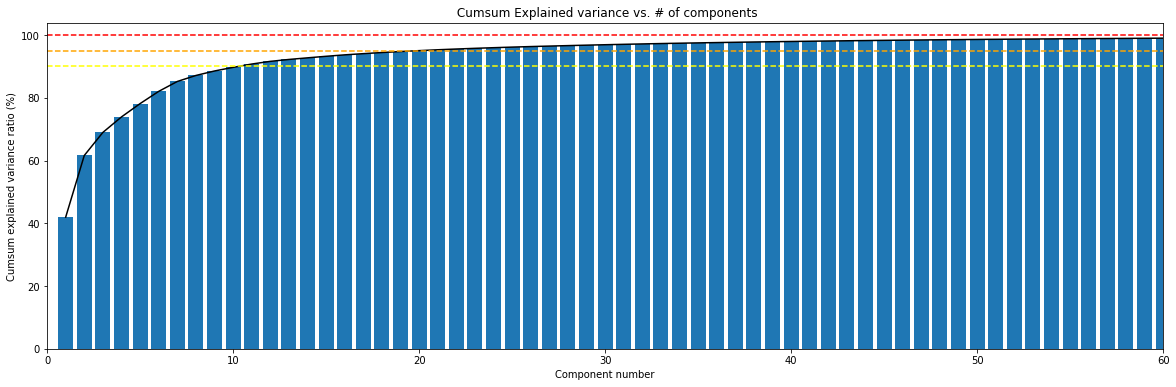

In [20]:
#cumul de variance expliquée
plt.figure(figsize=(20,6))
plt.plot(np.arange(1,n_components+1),np.cumsum(pca2.explained_variance_ratio_)*100, color='black')
plt.bar(np.arange(1,n_components+1),np.cumsum(pca2.explained_variance_ratio_)*100)
plt.axhline(y=90, color='yellow', linestyle='--')
plt.axhline(y=95, color='orange', linestyle='--')
plt.axhline(y=100, color='r', linestyle='--')
plt.title(" Cumsum Explained variance vs. # of components")
plt.xlim(0,pca2.n_components_)

plt.ylabel("Cumsum explained variance ratio (%)")
plt.xlabel("Component number")
plt.show();

# run SVM on pca2 data (59 PCs)

In [21]:
param_grid= [
    {'C': np.logspace(-2,5,12), 'gamma': np.logspace(-3,1,10), 'kernel': ['rbf']}, 
    {'C': np.logspace(-2,5,12), 'degree': list(range(1,8)) , 'kernel': ['poly']}
]


grid_svm_pca2 = GridSearchCV(SVC(random_state=0), param_grid=param_grid, cv=10, n_jobs=4,verbose=10,return_train_score=True)
# Fit on data
grid_model_pca2 = grid_svm_pca2.fit(X_train_pca2, y_train)

Fitting 10 folds for each of 204 candidates, totalling 2040 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1951s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0460s.) Setting batch_size=16.
[Parallel(n_jobs=4)]: Done  38 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 140 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 316 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 492 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 700 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 908 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 1148 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 1388 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done

In [22]:
results={}
# best params
print("Best estimator found by grid search:")
print(grid_model_pca2.best_estimator_)
print(grid_model_pca2.best_params_)
print('Best score: ', grid_model_pca2.best_score_)
results['Accuracy_SVM_after_pca_59PCs_gridsearchCV']=np.mean(grid_model_pca2.best_score_)

Best estimator found by grid search:
SVC(C=65.79332246575683, degree=1, kernel='poly', random_state=0)
{'C': 65.79332246575683, 'degree': 1, 'kernel': 'poly'}
Best score:  0.7786764705882353


# predictions

In [23]:
#pantalon', 'jupe', 't-shirt', 't-shirt', 'pantalon', 'robe',
target_name_list

['jupe', 'pantalon', 'robe', 't-shirt']

In [24]:
# Quantitative evaluation of the model quality on the test set
print("Predicting clothe's type on the test set")
y_pred_grid_pca2 =  grid_model_pca2.predict(X_test_pca2)
print(classification_report(y_test, y_pred_grid_pca2))
print("---------------------------")
print(confusion_matrix(y_test, y_pred_grid_pca2, labels=range(len(target_name_list))))

Predicting clothe's type on the test set
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       1.00      0.38      0.55         8
           2       0.73      0.85      0.79        13
           3       0.87      0.87      0.87        15

    accuracy                           0.73        41
   macro avg       0.74      0.67      0.66        41
weighted avg       0.79      0.73      0.73        41

---------------------------
[[ 3  0  1  1]
 [ 1  3  3  1]
 [ 2  0 11  0]
 [ 2  0  0 13]]


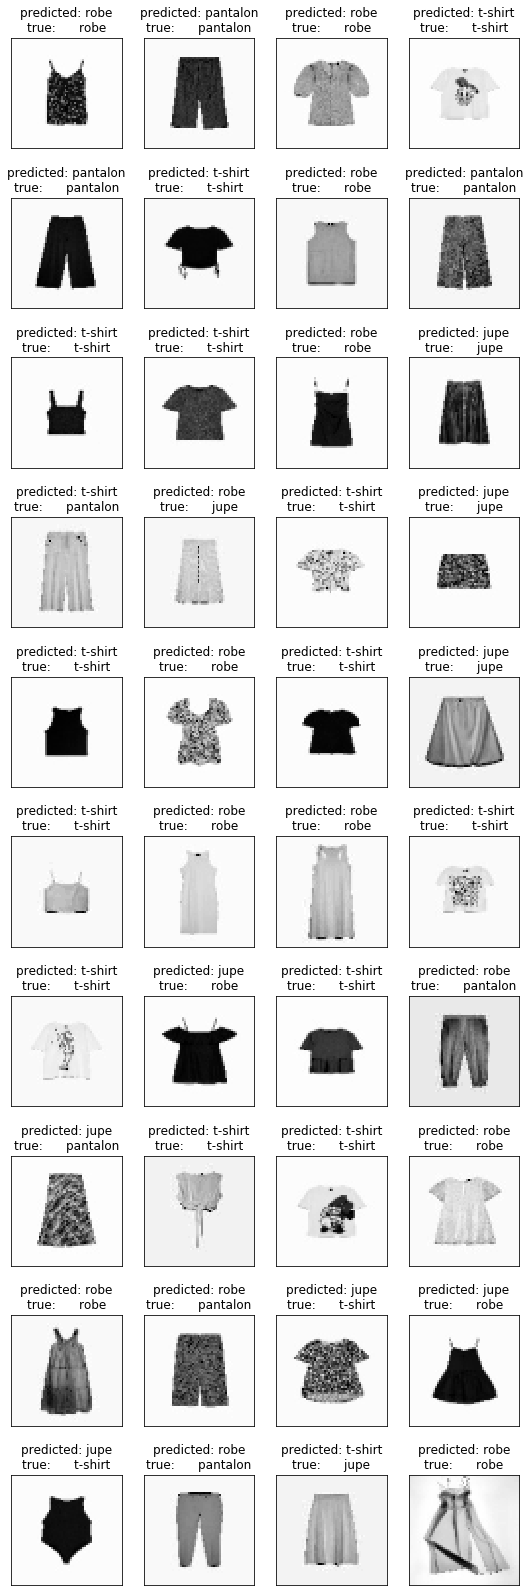

In [77]:
n_row=10; n_col=4
n_samples, h, w = images.shape


def plot_gallery(images, titles, h, w, n_row=n_row, n_col=n_col):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray) # 
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]]
    true_name = target_names[y_test[i]]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred_grid_pca2, np.array(y_test), target_name_list, i) for i in range(y_test.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# Test preprocessing https://towardsdatascience.com/dress-segmentation-with-autoencoder-in-keras-497cf1fd169a

<Figure size 1152x576 with 0 Axes>

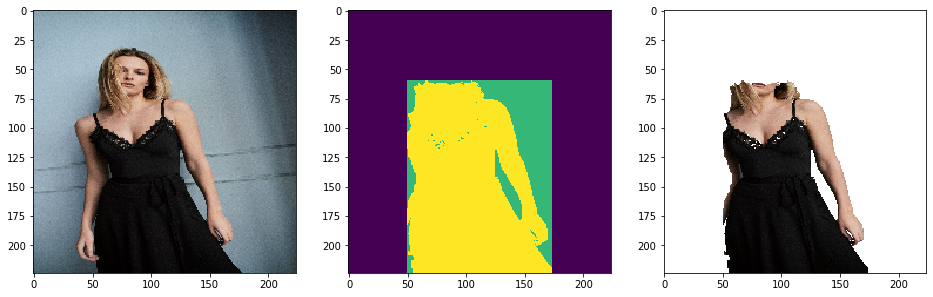

In [78]:


import cv2 as cv
def cut(img):
    #img= cv2.imread(img)

    img = cv2.resize(img,(224,224))
        
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    height, width = img.shape[:2]
    rect = (50,60,width-100,height-20)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,
               cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img2 = img*mask2[:,:,np.newaxis]
    img2[mask2 == 0] = (255, 255, 255)
    
    final = np.ones(img.shape,np.uint8)*0 + img2
    
    return mask, final

image_test='C:/Users/utilisateur/Documents/DataIA/Projet/Projet_Classification_ZARA/Algo/Images/jupes/jupe_0.jpg'
image_test2='C:/Users/utilisateur/Documents/DataIA/Projet/Projet_Classification_ZARA/Projet_Classification_ZARA/Raw_Images/jupes_112.jpg'

### APPLY GRUBCUT ###
plt.figure(figsize=(16,8))
original = cv.imread(image_test2)
original = cv.resize(original,(224,224))

plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGRA2RGB))
mask, final = cut(original)
plt.subplot(1,3,2)
plt.imshow(mask)
plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(final, cv.COLOR_BGRA2RGB))